In [1]:
#Import Numerical Libraries.
import pandas as pd
import numpy as np

#Import Graphical plotting Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries.
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Importing the dataset
data=pd.read_csv(r'C:\Users\HP\Downloads\car-mpg1.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [42]:
# lets rename the columns for better understanding
data.columns=['mileage','cylinders','dispersion','horsepower','weight','acceleration','model_year','origin','car_type','car_name']

In [44]:
data.head()

,mileage,cylinders,dispersion,horsepower,weight,acceleration,model_year,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [46]:
# lets drop the car name column as it is not useful for our analysis
data.drop('car_name',axis=1,inplace=True)

In [48]:
# lets replace origin from 0,1,2 to America, Europe, Asia
data['origin']=data['origin'].replace({1:'America',2:'Europe',3:'Asia'})
data=pd.get_dummies(data,columns=['origin'],dtype='int')

In [50]:
data.head()

,mileage,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [52]:
data.isna().sum()

mileage           0
cylinders         0
dispersion        0
horsepower        0
weight            0
acceleration      0
model_year        0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [54]:
# some data is containing '?', lets replace it with NaN
data.replace('?',np.nan,inplace=True)

In [56]:
data.isna().sum()

mileage           0
cylinders         0
dispersion        0
horsepower        6
weight            0
acceleration      0
model_year        0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [58]:
#lets check data types
data.dtypes

mileage           float64
cylinders           int64
dispersion        float64
horsepower         object
weight              int64
acceleration      float64
model_year          int64
car_type            int64
origin_America      int32
origin_Asia         int32
origin_Europe       int32
dtype: object

In [60]:
#lets convert horsepower to float and fill NaN with median value
data['horsepower']=data['horsepower'].astype(float)
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

In [62]:
data.isna().sum()

mileage           0
cylinders         0
dispersion        0
horsepower        0
weight            0
acceleration      0
model_year        0
car_type          0
origin_America    0
origin_Asia       0
origin_Europe     0
dtype: int64

In [64]:
# lets divide the data into dependent and independent variables
X=data.drop(['mileage'],axis=1)       # Independent variable.
y=data[['mileage']]                   # Dependent variable.

In [66]:
X.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_America,origin_Asia,origin_Europe
0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [68]:
y.head()

,mileage
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [72]:
#Scaling the Data.

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) # Converting scaled data into dataframe.

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns =['mileage']) # Ideally train, test data should be in columns.

In [74]:
X_s.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_America,origin_Asia,origin_Europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [76]:
y_s.head()

,mileage
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


In [80]:
#Split into train set , test set.

X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278, 10), (120, 10), (278, 1), (120, 1))

In [82]:
#Fit simple linear model and find coefficients.
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cylinders is 0.321022385691611
The coefficient for dispersion is 0.32483430918483897
The coefficient for horsepower is -0.22916950059437569
The coefficient for weight is -0.7112101905072298
The coefficient for acceleration is 0.014713682764191237
The coefficient for model_year is 0.3755811949510748
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_America is -0.07472247547584178
The coefficient for origin_Asia is 0.044515252035677896
The coefficient for origin_Europe is 0.04834854953945386
The intercept is 0.019284116103639764


In [144]:
#Regularized Ridge Regression

ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(X_train, y_train)

print('Ridge Model Coefficients: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here    
print('--------------------------------------------------------------------------')

intercept=ridge_model.intercept_[0]
print(f'    The intercept of the model is : {intercept}')

Ridge Model Coefficients: [[ 0.31342092  0.3058332  -0.22847018 -0.694599    0.01184253  0.37375577
   0.37448539 -0.07393064  0.04434815  0.04751706]]
--------------------------------------------------------------------------
    The intercept of the model is : 0.0191331373623864


In [148]:
#Regularized Lasso Regression

lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X_train, y_train)

print('Lasso Model Coefficients: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here 
print('--------------------------------------------------------------------------')

intercept=lasso_model.intercept_[0]
print(f'    The intercept of the model is : {intercept}')

Lasso Model Coefficients: [-0.         -0.         -0.         -0.32811279  0.          0.
  0.         -0.          0.          0.        ]
--------------------------------------------------------------------------
    The intercept of the model is : 0.003042367129955467


In [88]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780066
*************************
0.8343617931312616
0.8518882171608506
*************************
0.7938010766228453
0.8375229615977083


In [90]:
#poly = PolynomialFeatures(degree = 2, interaction_only = True)

#Fit calculates u and std dev while transform applies the transformation to a particular set of examples
#Here fit_transform helps to fit and transform the X_s
#Hence type(X_poly) is numpy.array while type(X_s) is pandas.DataFrame 
#X_poly = poly.fit_transform(X_s)
#Similarly capture the coefficients and intercepts of this polynomial feature model

In [92]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cylinders,dispersion,horsepower,weight,acceleration,model_year,car_type,origin_America,origin_Asia,origin_Europe,mileage
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [102]:
import statsmodels.formula.api as smf
ols=smf.ols('mileage ~ cylinders+dispersion+horsepower+weight+acceleration+model_year+car_type+origin_America+origin_Europe+origin_Asia',data_train_test).fit()
ols.params

Intercept         0.019284
cylinders         0.321022
dispersion        0.324834
horsepower       -0.229170
weight           -0.711210
acceleration      0.014714
model_year        0.375581
car_type          0.381477
origin_America   -0.074722
origin_Europe     0.048349
origin_Asia       0.044515
dtype: float64

In [106]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                mileage   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           3.12e-99
Time:                        14:48:53   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [124]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)
print('Mean Squared Error:',mse)
# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Mean Squared Error: 0.1426341322952594
Root Mean Squared Error: 0.37766934254087847


<Axes: xlabel='acceleration', ylabel='mileage'>

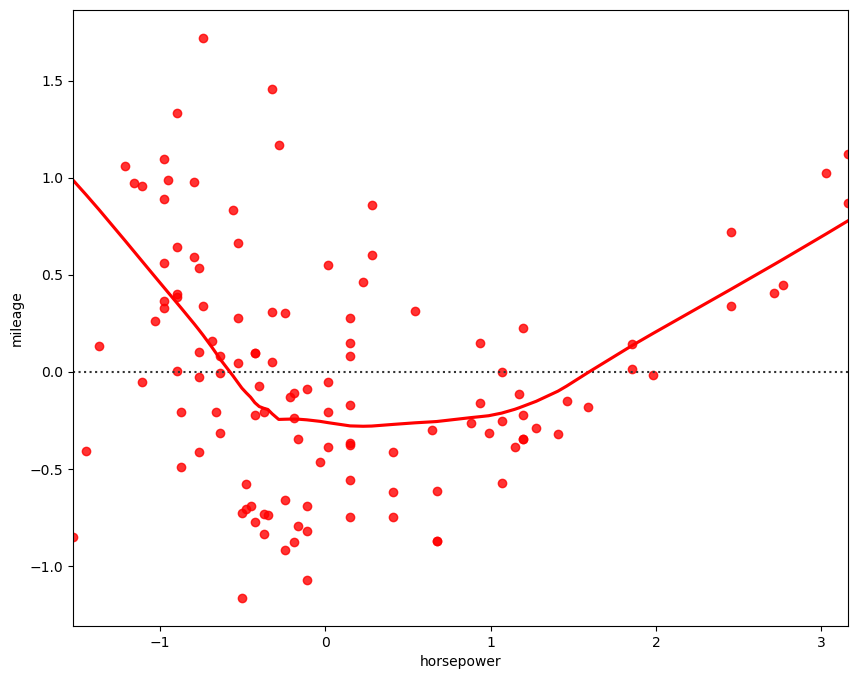

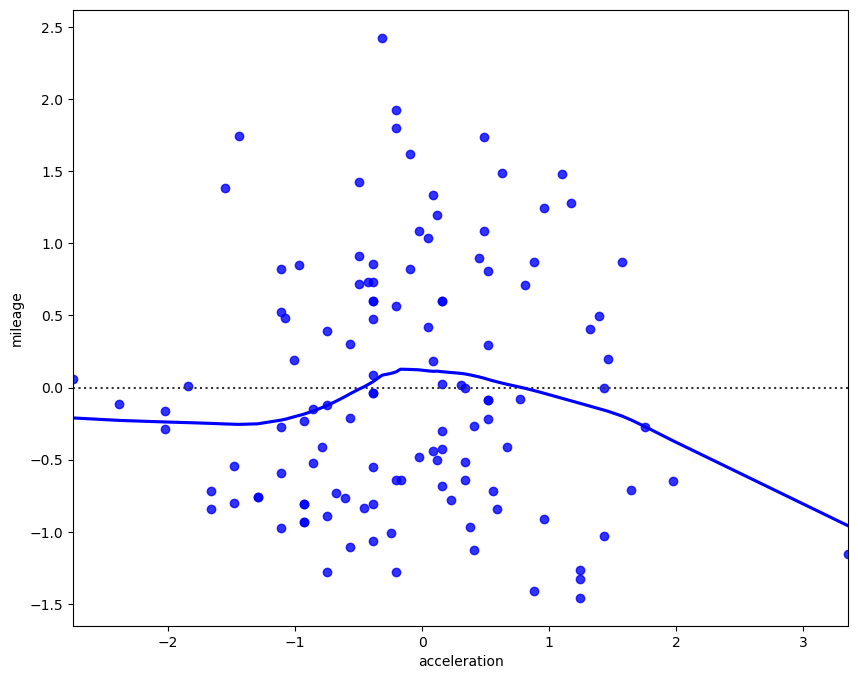

In [132]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['horsepower'], y= y_test['mileage'], color='red', lowess=True)


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acceleration'], y= y_test['mileage'], color='blue', lowess=True)

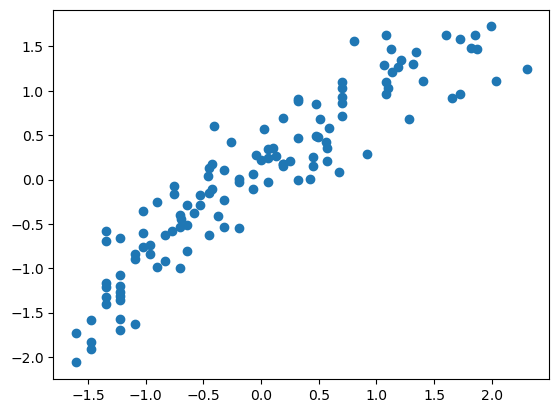

In [134]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mileage'], y_pred)